In [3]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [4]:
table = 'combined'
schema = 'features'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [5]:
df_pos = df[df['expert_match'] == 1]
df_neg = df[df['expert_match'] == 0]

In [6]:
def plot_mean_response(df, x):
    df.groupby(x)[target].mean().plot(kind="bar")
    plt.ylabel("P(y=1 | x)")
    plt.xlabel("x")
    plt.show()

In [7]:
def plot_cat_rate(df, cat_col):
    output = "home/etienne/projects/obsq/eda"
    rates = (
        df.groupby(cat_col)[target]
        .mean()
        .sort_values()
    )
    sns.barplot(x=rates.index[:20], y=rates.values[:20])
    plt.xticks(rotation=45, ha='right')   # or rotation=60, ha='right'
    plt.title(f"Observations rates for {cat_col}", fontsize=16)
    plt.savefig(f"{output}/{cat_col}_target_rates.jpg", dpi = 300, bbox_inches="tight")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39895 entries, 0 to 39894
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gbifID                              39895 non-null  int64  
 1   expert_match                        39895 non-null  int32  
 2   species                             39895 non-null  object 
 3   obsv_obs_count                      39895 non-null  int64  
 4   obsv_total_pct                      39895 non-null  float64
 5   obsv_expert_ids                     39895 non-null  int64  
 6   obsv_expert_ids_pct                 39895 non-null  float64
 7   obsv_avg_id_time                    39895 non-null  float64
 8   obsv_class_count                    39895 non-null  int64  
 9   obsv_order_count                    39895 non-null  int64  
 10  obsv_family_count                   39895 non-null  int64  
 11  obsv_genus_count                    39895

In [9]:
df.describe()

,gbifID,expert_match,obsv_obs_count,obsv_total_pct,obsv_expert_ids,obsv_expert_ids_pct,obsv_avg_id_time,obsv_class_count,obsv_order_count,obsv_family_count,...,meta_pheno_repro,meta_pheno_leaves,meta_pheno_sex,meta_occurrenceRemarks,pheno_leaves_month_density,pheno_sex_month_density,pheno_repro_month_density,taxo_freq,taxo_confusability_index,spatial_cluster
count,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,39895.00000,...,39895.00000,39895.00000,39895.00000,39895.00000,1773.00000,77.00000,3027.00000,39895.00000,39895.00000,39895.00000
mean,4652059483.06114,0.06617,542.38468,0.01364,15.08540,0.04740,24.78115,3.84805,23.59825,46.51766,...,0.15679,0.10229,0.00338,4.56200,0.29600,0.49869,0.29590,0.78841,4.03780,2.62359
std,717514072.43582,0.24859,949.82623,0.02389,23.44083,0.08594,48.78567,1.21312,11.84479,30.99767,...,0.36360,0.30304,0.05807,33.75431,0.20304,0.27523,0.27041,1.58547,7.74429,1.69414
min,3079585653.00000,0.00000,1.00000,0.00003,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00600,0.02700,0.00000,0.00100,0.00000,0.00000
25%,4102946555.50000,0.00000,32.00000,0.00080,0.00000,0.00000,2.00000,3.00000,14.00000,18.00000,...,0.00000,0.00000,0.00000,0.00000,0.14700,0.23600,0.08900,0.04400,0.00000,1.00000
50%,4902077694.00000,0.00000,143.00000,0.00360,3.00000,0.01700,11.00000,4.00000,26.00000,45.00000,...,0.00000,0.00000,0.00000,0.00000,0.23600,0.56600,0.19500,0.13400,0.00000,3.00000
75%,5187907432.00000,0.00000,491.00000,0.01235,19.00000,0.05600,21.00000,5.00000,34.00000,73.00000,...,0.00000,0.00000,0.00000,0.00000,0.37700,0.60900,0.50000,0.46800,3.00000,4.00000
max,5897886507.00000,1.00000,3389.00000,0.08525,88.00000,1.00000,1455.00000,5.00000,39.00000,97.00000,...,1.00000,1.00000,1.00000,2126.00000,1.00000,1.00000,1.00000,9.37100,24.00000,5.00000


In [10]:
df.var(numeric_only = True).sort_values(ascending=False)


gbifID                               514826444143428928.00000
histo_taxon_ttl_obs_count                       1688080.45669
obsv_obs_count                                   902169.86653
obsv_max_yearly_obs                              289291.27036
meta_coordinateUncertaintyInMeters               115550.59141
obsv_avg_yearly_obs                               54734.03262
obsv_avg_coord_un                                 42384.35933
obsv_max_monthly_obs                              37734.42096
obsv_species_count                                13901.51671
cmva_id_time                                      11432.75146
obsv_genus_count                                   6525.84910
obsv_avg_monthly_obs                               5995.50441
obsv_avg_descr_len                                 5357.38033
obsv_unique_dates                                  4234.00273
obsv_max_species_obs_count                         3025.54056
obsv_avg_id_time                                   2380.04167
meta_occ

In [11]:
columns = df.select_dtypes(include='number').columns.tolist()
strong_sep = []
moderate_sep = []
low_sep = []
skip = ['gbifID', 'expert_match']

for c in columns:
    if c in skip:
        continue 
    pos_mean = df_pos[c].mean()
    neg_mean = df_neg[c].mean()
    pos_std = df_pos[c].std()
    cohens_d = (pos_mean - neg_mean) / pos_std
    print(f"\n{c}: ", round(abs(cohens_d),3))
    if abs(cohens_d) > 0.5:
        print("  ✓ Strong separation - likely useful!")
        strong_sep.append(c)
    elif abs(cohens_d) > 0.2:
        print("  ⚠ Moderate separation - may be useful")
        moderate_sep.append(c)
    else:
        print("  ✗ Weak separation - may not help")
        low_sep.append(c)


obsv_obs_count:  0.465
  ⚠ Moderate separation - may be useful

obsv_total_pct:  0.465
  ⚠ Moderate separation - may be useful

obsv_expert_ids:  0.246
  ⚠ Moderate separation - may be useful

obsv_expert_ids_pct:  0.051
  ✗ Weak separation - may not help

obsv_avg_id_time:  0.021
  ✗ Weak separation - may not help

obsv_class_count:  0.041
  ✗ Weak separation - may not help

obsv_order_count:  0.186
  ✗ Weak separation - may not help

obsv_family_count:  0.223
  ⚠ Moderate separation - may be useful

obsv_genus_count:  0.292
  ⚠ Moderate separation - may be useful

obsv_species_count:  0.292
  ⚠ Moderate separation - may be useful

obsv_unique_year_count:  0.079
  ✗ Weak separation - may not help

obsv_unique_dates:  0.275
  ⚠ Moderate separation - may be useful

obsv_max_yearly_obs:  0.472
  ⚠ Moderate separation - may be useful

obsv_max_monthly_obs:  0.465
  ⚠ Moderate separation - may be useful

obsv_avg_yearly_obs:  0.429
  ⚠ Moderate separation - may be useful

obsv_avg_monthly

In [12]:
strong_sep

['obsv_avg_species_obs_count', 'pheno_sex_month_density', 'spatial_cluster']

In [13]:
print(len(moderate_sep))
moderate_sep

15


['obsv_obs_count',
 'obsv_total_pct',
 'obsv_expert_ids',
 'obsv_family_count',
 'obsv_genus_count',
 'obsv_species_count',
 'obsv_unique_dates',
 'obsv_max_yearly_obs',
 'obsv_max_monthly_obs',
 'obsv_avg_yearly_obs',
 'obsv_avg_monthly_obs',
 'obsv_avg_descr_len',
 'obsv_max_species_obs_count',
 'histo_taxon_obs_month_density',
 'tempo_month']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.preprocessing import StandardScaler




In [27]:
scaler = StandardScaler()
col = strong_sep + moderate_sep + low_sep
X = df[col].fillna(0)
y = df[target]
X


,obsv_avg_species_obs_count,pheno_sex_month_density,spatial_cluster,obsv_obs_count,obsv_total_pct,obsv_expert_ids,obsv_family_count,obsv_genus_count,obsv_species_count,obsv_unique_dates,...,meta_media_count,meta_coordinateUncertaintyInMeters,meta_pheno_repro,meta_pheno_leaves,meta_pheno_sex,meta_occurrenceRemarks,pheno_leaves_month_density,pheno_repro_month_density,taxo_freq,taxo_confusability_index
0,9.63000,0.00000,1,3389,0.08525,38,97,244,352,218,...,20,0,1,1,0,0,0.20000,0.14400,0.05700,0
1,9.63000,0.00000,1,3389,0.08525,38,97,244,352,218,...,30,4,1,1,0,0,0.22900,0.05500,2.74300,24
2,1.94000,0.00000,5,330,0.00830,0,69,137,170,18,...,30,15,1,1,0,0,0.18900,0.76700,1.61900,24
3,1.11000,0.00000,1,21,0.00053,0,19,19,19,9,...,40,0,1,1,0,0,0.05300,0.12500,0.01000,0
4,9.63000,0.00000,1,3389,0.08525,38,97,244,352,218,...,10,0,1,1,0,0,0.09100,0.23800,0.12600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39890,2.64000,0.00000,0,751,0.01889,88,68,189,284,84,...,10,0,1,0,0,0,0.00000,0.04800,0.05200,0
39891,1.14000,0.33300,0,24,0.00060,0,12,19,21,1,...,0,5,0,1,1,14,0.16400,0.00000,0.00500,0
39892,3.47000,0.39100,5,990,0.02490,8,86,203,285,123,...,40,10,0,1,1,69,0.19300,0.00000,9.37100,24
39893,3.47000,0.04500,5,990,0.02490,8,86,203,285,123,...,30,12,0,1,1,0,0.12900,0.00000,0.06700,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_samples = len(y_train)
n_pos = y_train.sum()
n_neg = n_samples - n_pos
scale_pos_weight = n_neg / n_pos

In [29]:
model = LogisticRegression(solver='liblinear', class_weight='balanced',max_iter=1000, random_state=0) # 'lbfgs' is default in newer versions



In [30]:
model = RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced',
                max_depth=10,
                random_state=42,
                n_jobs=-1
            )

In [31]:
model = XGBClassifier(
                n_estimators=100,
                max_depth=6,
                scale_pos_weight=scale_pos_weight,
                learning_rate=0.1,
                random_state=42,
                eval_metric='logloss')


In [32]:
model.fit(X_train_scaled, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [33]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluate the model (e.g., accuracy, confusion matrix, classification report)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.817325045117305
Confusion Matrix:
 [[7682 1632]
 [ 190  470]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      9314
           1       0.22      0.71      0.34       660

    accuracy                           0.82      9974
   macro avg       0.60      0.77      0.62      9974
weighted avg       0.93      0.82      0.86      9974



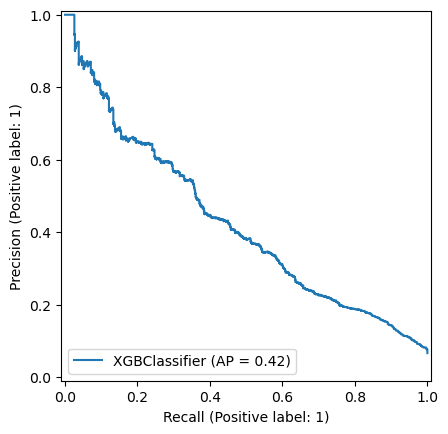

In [34]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay.from_estimator(
   model, X_test_scaled, y_test)

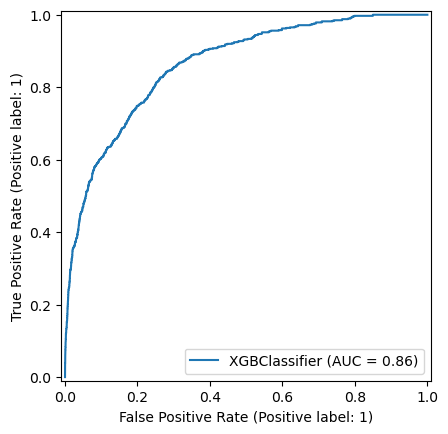

In [35]:
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)

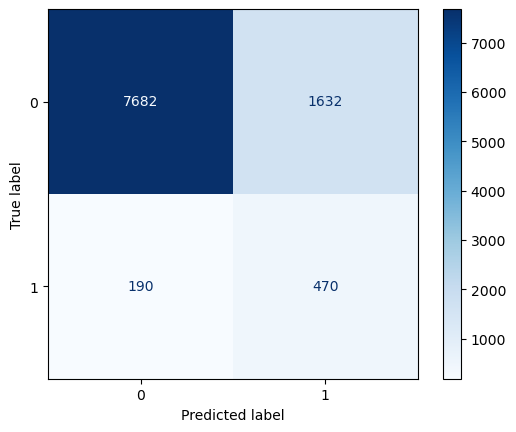

In [36]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')